# Kernel Density Estimation: 1D and 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KernelDensity

## Generate 1D data set

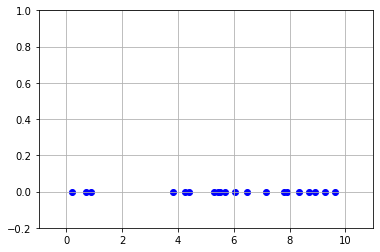

In [2]:
np.random.seed(0)
x = 10*np.random.rand(20)
plt.scatter(x, np.zeros(x.shape), c='b')
plt.axis(np.array([-1,11,-0.2,1]))
plt.grid()
plt.show()

## Define the KDE class

In [3]:
class my_kde:
    def fit_1d(self, X, h=None):
        self.X = X
        x_lo = np.min(X) - 0.5*(np.max(X) - np.min(X))
        x_hi = np.max(X) + 0.5*(np.max(X) - np.min(X))
        x_fine = np.linspace(x_lo, x_hi, 150)
        y_fine = np.zeros(x_fine.shape)

        n = len(X)
        
        if h == None:
            self.h = np.std(X) * (4/3/n) ** 0.2   # Silverman's rule
        else:
            self.h = h

        for i in range(len(x_fine)):
            y_fine[i] = np.sum(np.exp(-(((X - x_fine[i]) / self.h) ** 2))) / n / self.h

        return x_fine, y_fine
    
    def fit_2d(self, X, h=None):
        self.X = X
        x_lo = np.min(X, axis=0) - 0.2*(np.max(X, axis=0) - np.min(X, axis=0))
        x_hi = np.max(X, axis=0) + 0.2*(np.max(X, axis=0) - np.min(X, axis=0))

        X1, X2 = np.meshgrid(np.linspace(x_lo[0], x_hi[0], 150), 
                             np.linspace(x_lo[1], x_hi[1], 150))
        Xf = np.hstack((X1.reshape(-1,1), X2.reshape(-1,1)))
        Yf = np.zeros(len(Xf))

        n = len(X)
        
        if h == None:
            self.h = np.std(X) * n ** (-1/6)      # Silverman's rule
        else:
            self.h = h

        for i in range(len(Xf)):    
            Yf[i] = np.sum(np.exp(-(np.sum((X - Xf[i,:]) ** 2, axis=1)/ self.h))) / n / self.h ** 2
            
        return X1, X2, Yf.reshape(X1.shape)

## Apply KDE to 1D data

My bandwidth: 1.60530443563173
Sklearn bandwidth: 0.581810759152688


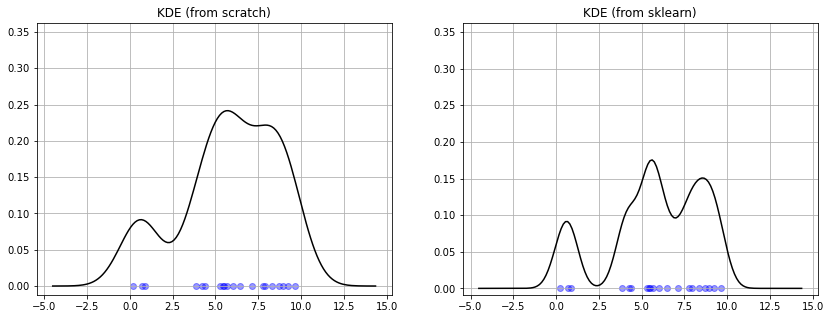

In [4]:
kde = my_kde()
x_fine, y_fine = kde.fit_1d(x)

print(f"My bandwidth: {kde.h}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(x_fine, y_fine, c='k')
ax1.scatter(x, np.zeros(x.shape), c='b', alpha=0.4)
ax1.set_ylim(top = np.max(y_fine)*1.5)
ax1.set_title('KDE (from scratch)')
ax1.grid()

kde = KernelDensity(kernel='gaussian', 
                    bandwidth='silverman').fit(x.reshape(-1,1))
print(f"Sklearn bandwidth: {kde.bandwidth_}")
log_density = kde.score_samples(x_fine.reshape(-1,1))
ax2.scatter(x, np.zeros(x.shape), c='b', alpha=0.4)
ax2.plot(x_fine, np.exp(log_density), c='k')
ax2.set_ylim(top = np.max(y_fine)*1.5)
ax2.set_title('KDE (from sklearn)')
ax2.grid()
plt.show()

## Generate 2D data set

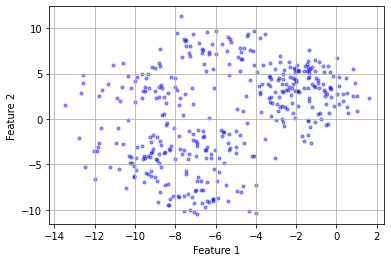

In [5]:
X, _ = make_blobs(n_samples=400, centers=8, cluster_std=1.5, random_state=1)
plt.scatter(X[:,0], X[:,1], c='b', s=10, alpha=0.4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

# Apply KDE to 2D data

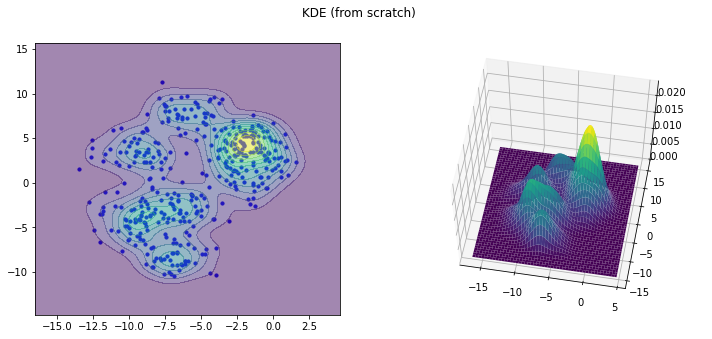

In [6]:
kde = my_kde()
X1, X2, Yf = kde.fit_2d(X)

fig = plt.figure(figsize=(12,5))
fig.suptitle("KDE (from scratch)")
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(X[:,0], X[:,1], c='b', s=10)
ax1.contourf(X1, X2, Yf, alpha=0.5, levels=12)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X1, X2, Yf, cmap='viridis')
ax2.view_init(azim=-80, elev=60)
plt.show()